# First look at our dataset

In this notebook, we look at the necessary steps required before any machine
 learning takes place. It involves:

* loading the data;
* looking at the variables in the dataset, in particular, differentiate
  between numerical and categorical variables, which need different
  preprocessing in most machine learning workflows;
* visualizing the distribution of the variables to gain some insights into the
  dataset.

## Loading the adult census dataset

We use data from the 1994 US census that we downloaded from
[OpenML](http://openml.org/).

You can look at the OpenML webpage to learn more about this dataset:
<http://www.openml.org/d/1590>

The dataset is available as a CSV (Comma-Separated Values) file and we use
`pandas` to read it.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"><a class="reference external" href="https://pandas.pydata.org/">Pandas</a> is a Python library used for
manipulating 1 and 2 dimensional structured data. If you have never used
pandas, we recommend you look at this
<a class="reference external" href="https://pandas.pydata.org/docs/user_guide/10min.html">tutorial</a>.</p>
</div>

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census.csv")

The goal with this data is to predict whether a person earns over 50K a year
from heterogeneous data such as age, employment, education, family
information, etc.

## The variables (columns) in the dataset

The data are stored in a `pandas` dataframe. A dataframe is a type of
structured data composed of 2 dimensions. This type of data is also referred
as tabular data.

Each row represents a "sample". In the field of machine learning or
descriptive statistics, commonly used equivalent terms are "record",
"instance", or "observation".

Each column represents a type of information that has been collected and is
called a "feature". In the field of machine learning and descriptive
statistics, commonly used equivalent terms are "variable", "attribute", or
"covariate".

A quick way to inspect the dataframe is to show the first few lines with the
`head` method:

In [3]:
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


An alternative is to omit the `head` method. This would output the initial and
final rows and columns, but everything in between is not shown by default. It
also provides the dataframe's dimensions at the bottom in the format `n_rows`
x `n_columns`.

In [5]:
adult_census

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The column named **class** is our target variable (i.e., the variable which we
want to predict). The two possible classes are `<=50K` (low-revenue) and
`>50K` (high-revenue). The resulting prediction problem is therefore a binary
classification problem as `class` has only two possible values. We use the
left-over columns (any column other than `class`) as input variables for our
model.

In [6]:
target_column = "class"
adult_census[target_column].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>Here, classes are slightly imbalanced, meaning there are more samples of one
or more classes compared to others. In this case, we have many more samples
with <tt class="docutils literal">" &lt;=50K"</tt> than with <tt class="docutils literal">" &gt;50K"</tt>. Class imbalance happens often in practice
and may need special techniques when building a predictive model.</p>
<p class="last">For example in a medical setting, if we are trying to predict whether subjects
may develop a rare disease, there would be a lot more healthy subjects than
ill subjects in the dataset.</p>
</div>

The dataset contains both numerical and categorical data. Numerical values
take continuous values, for example `"age"`. Categorical values can have a
finite number of values, for example `"native-country"`.

In [10]:
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

We can check the number of samples and the number of columns available in the
dataset:

In [14]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


We can compute the number of features by counting the number of columns and
subtract 1, since one of the columns is the target.

In [15]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


## Visual inspection of the data
Before building a predictive model, it is a good idea to look at the data:

* maybe the task you are trying to achieve can be solved without machine
  learning;
* you need to check that the information you need for your task is actually
  present in the dataset;
* inspecting the data is a good way to find peculiarities. These can arise
  during data collection (for example, malfunctioning sensor or missing
  values), or from the way the data is processed afterwards (for example
  capped values).

Let's look at the distribution of individual features, to get some insights
about the data. We can start by plotting histograms, note that this only works
for features containing numerical values:

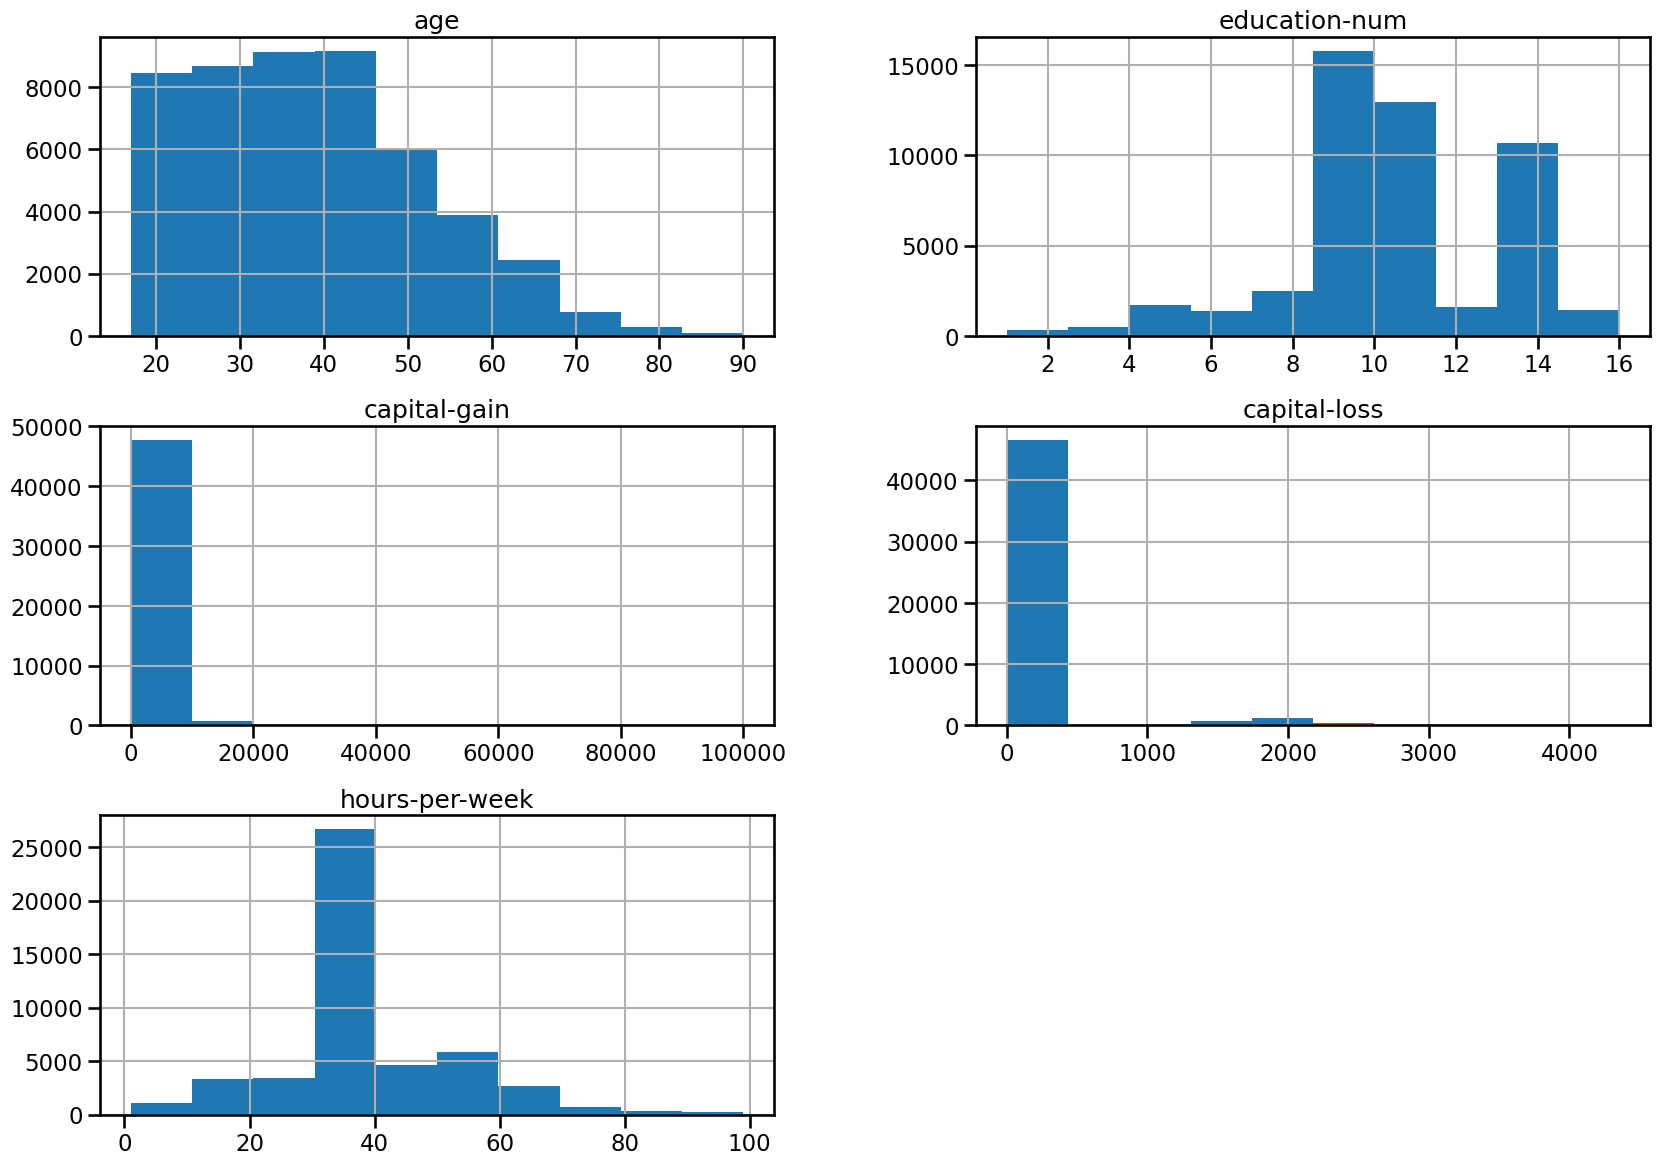

In [18]:
_ = adult_census.hist(figsize=(20, 14))

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">In the previous cell, we used the following pattern: <tt class="docutils literal">_ = func()</tt>. We do this
to avoid showing the output of <tt class="docutils literal">func()</tt> which in this case is not that
useful. We actually assign the output of <tt class="docutils literal">func()</tt> into the variable <tt class="docutils literal">_</tt>
(called underscore). By convention, in Python the underscore variable is used
as a "garbage" variable to store results that we are not interested in.</p>
</div>

We can already make a few comments about some of the variables:

* `"age"`: there are not that many points for `age > 70`. The dataset
  description does indicate that retired people have been filtered out
  (`hours-per-week > 0`);
* `"education-num"`: peak at 10 and 13, hard to tell what it corresponds to
  without looking much further. We'll do that later in this notebook;
* `"hours-per-week"` peaks at 40, this was very likely the standard number of
  working hours at the time of the data collection;
* most values of `"capital-gain"` and `"capital-loss"` are close to zero.

For categorical variables, we can look at the distribution of values:

In [19]:
adult_census["sex"].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

Note that the data collection process resulted in an important imbalance
between the number of male/female samples.

Be aware that training a model with such data imbalance can cause
disproportioned prediction errors for the under-represented groups. This is a
typical cause of
[fairness](https://docs.microsoft.com/en-us/azure/machine-learning/concept-fairness-ml#what-is-machine-learning-fairness)
problems if used naively when deploying a machine learning based system in a
real life setting.

We recommend our readers to refer to [fairlearn.org](https://fairlearn.org)
for resources on how to quantify and potentially mitigate fairness issues
related to the deployment of automated decision making systems that rely on
machine learning components.

Studying why the data collection process of this dataset lead to such an
unexpected gender imbalance is beyond the scope of this MOOC but we should
keep in mind that this dataset is not representative of the US population
before drawing any conclusions based on its statistics or the predictions of
models trained on it.

In [20]:
adult_census["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

As noted above, `"education-num"` distribution has two clear peaks around 10
and 13. It would be reasonable to expect that `"education-num"` is the number
of years of education.

Let's look at the relationship between `"education"` and `"education-num"`.

In [21]:
pd.crosstab(
    index=adult_census["education"], columns=adult_census["education-num"]
)

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


For every entry in `\"education\"`, there is only one single corresponding
value in `\"education-num\"`. This shows that `"education"` and
`"education-num"` give you the same information. For example,
`"education-num"=2` is equivalent to `"education"="1st-4th"`. In practice that
means we can remove `"education-num"` without losing information. Note that
having redundant (or highly correlated) columns can be a problem for machine
learning algorithms.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In the upcoming notebooks, we will only keep the <tt class="docutils literal">"education"</tt> variable,
excluding the <tt class="docutils literal"><span class="pre">"education-num"</span></tt> variable since the latter is redundant with
the former.</p>
</div>

Another way to inspect the data is to do a `pairplot` and show how each
variable differs according to our target, i.e. `"class"`. Plots along the
diagonal show the distribution of individual variables for each `"class"`. The
plots on the off-diagonal can reveal interesting interactions between
variables.

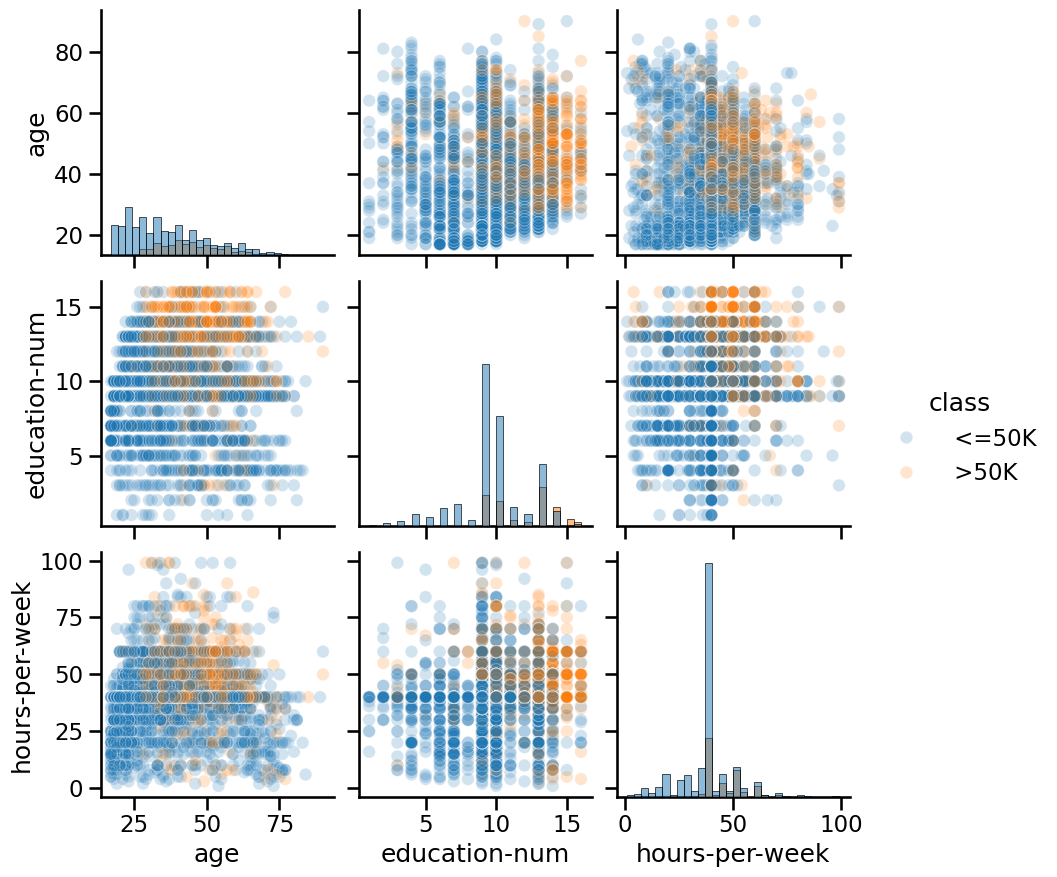

In [22]:
import seaborn as sns

# We plot a subset of the data to keep the plot readable and make the plotting
# faster
n_samples_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

## Creating decision rules by hand

By looking at the previous plots, we could create some hand-written rules that
predict whether someone has a high- or low-income. For instance, we could
focus on the combination of the `"hours-per-week"` and `"age"` features.

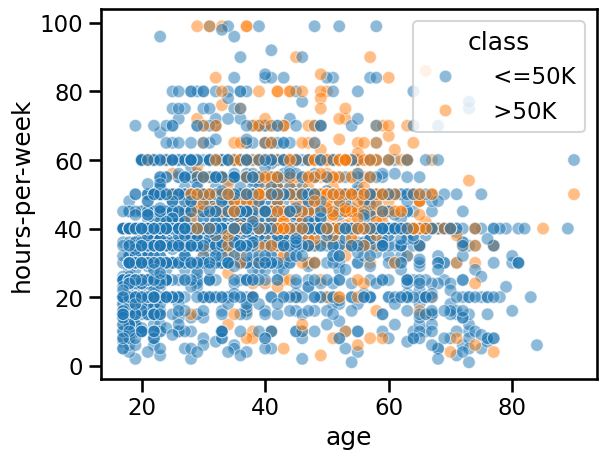

In [23]:
_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

The data points (circles) show the distribution of `"hours-per-week"` and
`"age"` in the dataset. Blue points mean low-income and orange points mean
high-income. This part of the plot is the same as the bottom-left plot in the
pairplot above.

In this plot, we can try to find regions that mainly contains a single class
such that we can easily decide what class one should predict. We could come up
with hand-written rules as shown in this plot:

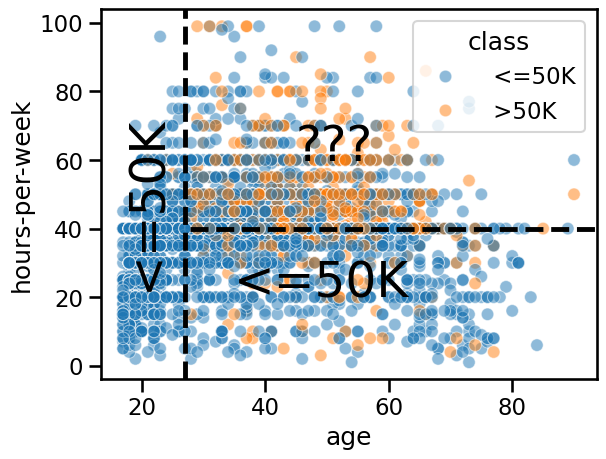

In [24]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

* In the region `age < 27` (left region) the prediction is low-income. Indeed,
  there are many blue points and we cannot see any orange points.
* In the region `age > 27 AND hours-per-week < 40` (bottom-right region), the
  prediction is low-income. Indeed, there are many blue points and only a few
  orange points.
* In the region `age > 27 AND hours-per-week > 40` (top-right region), we see
  a mix of blue points and orange points. It seems complicated to choose which
  class we should predict in this region.

It is interesting to note that some machine learning models work similarly to
what we did: they are known as decision tree models. The two thresholds that
we chose (27 years and 40 hours) are somewhat arbitrary, i.e. we chose them by
only looking at the pairplot. In contrast, a decision tree chooses the "best"
splits based on data without human intervention or inspection. Decision trees
will be covered more in detail in a future module.

Note that machine learning is often used when creating rules by hand is not
straightforward. For example because we are in high dimension (many features
in a table) or because there are no simple and obvious rules that separate the
two classes as in the top-right region of the previous plot.

To sum up, the important thing to remember is that in a machine-learning
setting, a model automatically creates the "rules" from the existing data in
order to make predictions on new unseen data.

## Notebook Recap

In this notebook we:

* loaded the data from a CSV file using `pandas`;
* looked at the different kind of variables to differentiate between
  categorical and numerical variables;
* inspected the data with `pandas` and `seaborn`. Data inspection can allow
  you to decide whether using machine learning is appropriate for your data
  and to highlight potential peculiarities in your data.

We made important observations (which will be discussed later in more detail):

* if your target variable is imbalanced (e.g., you have more samples from one
  target category than another), you may need to be careful when interpreting
  the values of performance metrics;
* columns can be redundant (or highly correlated), which is not necessarily a
  problem, but may require special treatment as we will cover in future
  notebooks;
* decision trees create prediction rules by comparing each feature to a
  threshold value, resulting in decision boundaries that are always parallel
  to the axes. In 2D, this means the boundaries are vertical or horizontal
  line segments at the feature threshold values.